In [8]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from scipy.stats import pearsonr

In [2]:

df= pd.read_csv("./data/nike_sales_2024.csv")
df

,Month,Region,Main_Category,Sub_Category,Product_Line,Price_Tier,Units_Sold,Revenue_USD,Online_Sales_Percentage,Retail_Price
0,November,India,Equipment,Bags,Gym Sack,Budget,48356,14506800,73,300
1,January,India,Equipment,Accessories,Hats,Budget,9842,2066820,50,210
2,October,India,Apparel,Tops,Tech Fleece,Mid-Range,25079,1755530,90,70
3,December,Greater China,Footwear,Cricket,Vapor Cricket,Premium,41404,8694840,58,210
4,May,Greater China,Equipment,Socks,Performance Socks,Premium,33569,5371040,53,160
...,...,...,...,...,...,...,...,...,...,...
995,October,India,Equipment,Accessories,Hats,Mid-Range,9870,987000,82,100
996,July,Europe,Equipment,Socks,Performance Socks,Mid-Range,14668,2640240,88,180
997,August,Japan,Footwear,Football,Phantom Vision,Premium,15078,2261700,74,150
998,May,South Korea,Equipment,Socks,Crew Socks,Premium,26242,1312100,52,50


In [3]:
target_col=['Revenue_USD']

In [4]:
import pandas as pd
from scipy.stats import pearsonr

def get_features_num_regression(df, target_col, umbral_corr=0.3, pvalue=None):
    """
    Devuelve una lista con las columnas numéricas del DataFrame cuya correlación absoluta con target_col 
    sea superior a umbral_corr. Si pvalue no es None, también se filtran por significación estadística.
    Si los argumentos de entrada no son adecuados, devuelve None e imprime la razón.

    Args:
        df (pd.DataFrame): DataFrame con los datos.
        target_col (str): Columna del DataFrame que será utilizada como target (debe ser numérica continua).
        umbral_corr (float): Umbral de correlación absoluta (0 a 1).
        pvalue (float, optional): Nivel de significancia para filtrar (1 - pvalue).

    Returns:
        list or None: Lista de columnas numéricas que cumplen los criterios, o None si los argumentos son inválidos.
    """
    # Comprobación 1: Que el DataFrame sea válido
    if not isinstance(df, pd.DataFrame):
        print("Error: El argumento 'df' debe ser un DataFrame de pandas.")
        return None

    # Comprobación 2: Que target_col exista y sea numérica continua
    if target_col not in df.columns:
        print(f"Error: La columna target '{target_col}' no está en el DataFrame.")
        return None
    if not pd.api.types.is_numeric_dtype(df[target_col]):
        print(f"Error: La columna target '{target_col}' no es numérica.")
        return None
    if len(df[target_col].unique()) <= 10:  # Suponemos que <10 valores únicos no es continuo
        print(f"Error: La columna target '{target_col}' no parece ser continua (tiene pocos valores únicos).")
        return None

    # Comprobación 3: Que umbral_corr sea un float entre 0 y 1
    if not isinstance(umbral_corr, (float, int)) or not (0 <= umbral_corr <= 1):
        print("Error: El argumento 'umbral_corr' debe ser un número entre 0 y 1.")
        return None

    # Comprobación 4: Que pvalue sea None o un float válido
    if pvalue is not None and (not isinstance(pvalue, (float, int)) or not (0 < pvalue <= 1)):
        print("Error: El argumento 'pvalue' debe ser None o un número entre 0 y 1.")
        return None

    # Seleccionar columnas numéricas excluyendo el target
    columnas_numericas = df.select_dtypes(include='number').columns
    columnas_numericas = [col for col in columnas_numericas if col != target_col]

    if len(columnas_numericas) == 0:
        print("Error: No hay columnas numéricas (excluyendo la target) en el DataFrame.")
        return None

    # Lista para almacenar las columnas que cumplen los criterios
    columnas_seleccionadas = []

    # Calcular correlaciones y valores p
    for col in columnas_numericas:
        correlacion, p_val = pearsonr(df[col], df[target_col])

        # Filtrar por correlación
        if abs(correlacion) > umbral_corr:
            # Filtrar por p-value si se proporciona
            if pvalue is None or p_val <= pvalue:
                columnas_seleccionadas.append(col)

    # Si no se encuentran columnas que cumplan los criterios, devolver None
    if not columnas_seleccionadas:
        print("No se encontraron columnas que cumplan con los criterios especificados.")
        return None

    return columnas_seleccionadas

In [5]:
# Llamo a la función
resultado = get_features_num_regression(
    df= df,           
    target_col="Revenue_USD",    
    umbral_corr=0.5,             
    pvalue=0.05                 
)

print(resultado)

['Units_Sold', 'Retail_Price']


In [6]:
def plot_features_num_regression(df, target_col, selected_features):
    """
    Lo que hace esta función es generar gráficas para ver la relación entre las features y la variable objetivo

    Argumentos:
    - df_nike (pd.DataFrame): DataFrame de entrada de los datos
    - target_col (str): Nombre de la columna objetivo (tiene que ser numérica).
    - selected_features (list): Lista de variables seleccionadas para hacer el modelo de regresión.

    Returns:
    - Devuelve gráficas de dispersión entre cada variable seleccionada y la variable target
    """
    # Hago las validaciones oportunas
    if not isinstance(df, pd.DataFrame):
        raise ValueError("El argumento 'df_nike' debe ser un DataFrame")
    
    if target_col not in df.columns:
        raise ValueError(f"'{target_col}' no está en el DataFrame")
    
    if not pd.api.types.is_numeric_dtype(df[target_col]):
        raise ValueError(f" '{target_col}' no es numérica")
    
    if not selected_features or not isinstance(selected_features, list):
        raise ValueError("El argumento 'selected_features' debe ser una lista de variables")
    
    # Filtro las variables seleccionadas del DataFrame
    selected_features = [col for col in selected_features if col in df.columns]
    
    if len(selected_features) == 0: 
        raise ValueError("No hay variables seleccionadas en el DataFrame")

    for feature in selected_features:
        plt.figure(figsize=(8, 6))
        sns.scatterplot(x=df[feature], y=df[target_col], alpha=0.7)
        plt.title(f"Relación entre {feature} y {target_col}")
        plt.xlabel(feature)
        plt.ylabel(target_col)
        plt.grid(True)
        plt.show()

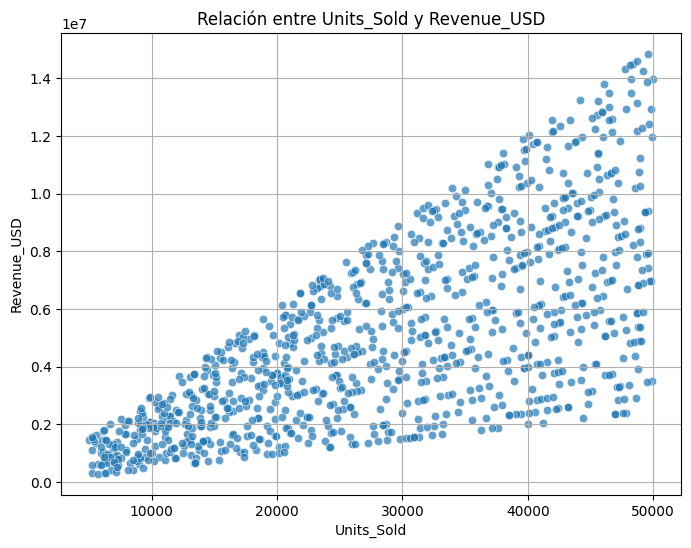

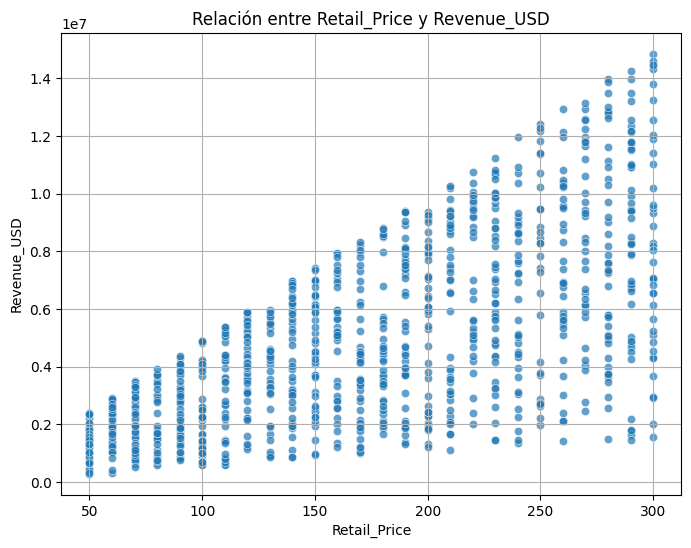

In [9]:
selected_features = ["Units_Sold", "Retail_Price"]
plot_features_num_regression(df, target_col="Revenue_USD", selected_features=selected_features)

In [10]:
df.columns

Index(['Month', 'Region', 'Main_Category', 'Sub_Category', 'Product_Line',
       'Price_Tier', 'Units_Sold', 'Revenue_USD', 'Online_Sales_Percentage',
       'Retail_Price'],
      dtype='object')

In [11]:
features_cat=['Month', 'Sub_Category', 'Product_Line']

In [12]:
target_col="Revenue_USD"

# LA SIGUIENTE FUNCION ESTABA MAL POR QUE NO ERA EL Z TEST  HABIA QUE HACER CHI CUADRADO O ANOVA

In [13]:
from math import sqrt
from statsmodels.stats.proportion import proportions_ztest
import pandas as pd

def get_features_cat_regression(df, target_col, pvalue=0.05):
      # Comprobación  Que el DataFrame sea válido
    if not isinstance(df, pd.DataFrame):
        print("Error: El argumento 'df' debe ser un DataFrame de pandas.")
        return None

    # Comprobación  Que target_col exista y sea numérica continua
    if target_col not in df.columns:
        print(f"Error: La columna target '{target_col}' no está en el DataFrame.")
        return None
    if not pd.api.types.is_numeric_dtype(df[target_col]):
        print(f"Error: La columna target '{target_col}' no es numérica.")
        return None
     # Identificar automáticamente las columnas categóricas
    features_cat = [col for col in df.columns if df[col].dtype == 'object']
    significant_features = []

    for col in features_cat:
        unique_values = df[col].dropna().unique()
        num_unique = len(unique_values)

        if num_unique == 2:  # Test basado en proporciones
            p_hat = df[col].value_counts(normalize=True).max()
            n = len(df[col].dropna())
            Pi = 0.5  # Valor esperado teórico
            _, p_val = proportions_ztest(p_hat * n, n, Pi)
            if p_val < pvalue:
                significant_features.append(col)
                
        elif num_unique > 2:  # Test basado en la media
            s = df[target_col].std()
            SE = s / sqrt(len(df[target_col].dropna()))
            IC = 1.96 * SE
            category_means = df.groupby(col)[target_col].mean()
            overall_mean = df[target_col].mean()
            if any(abs(category_means - overall_mean) > IC):
                significant_features.append(col)
              
    return significant_features

In [14]:
result = get_features_cat_regression(df, "Revenue_USD",pvalue=0.05)
print("Variables significativas:",result)

Variables significativas: ['Month', 'Region', 'Sub_Category', 'Product_Line', 'Price_Tier']


## ESTA FUNCION SERIA LA CORRECTA Y ME DEVUELVE SUBCATEGORY

In [15]:
import numpy as np
import pandas as pd
from scipy.stats import f_oneway, kruskal

def get_features_cat_regression(df, target_col, pvalue=0.05):
    """
    Devuelve una lista con las columnas categóricas del DataFrame cuyo test de relación con la columna
    designada por 'target_col' sea estadísticamente significativa usando ANOVA o Kruskal-Wallis.
    
    Argumentos:
    df: DataFrame para analizar.
    target_col (str): Columna objetivo (numérica).
    pvalue (float): Nivel de significancia para el test. Por defecto es 0.05.
    
    Retorna:
    list: Una lista con las columnas categóricas del DataFrame que tienen una relación significativa
          con la columna objetivo.
    """
    # Comprobar que la columna objetivo existe y es numérica
    if target_col not in df.columns:
        raise ValueError(f"La columna '{target_col}' no existe en el DataFrame.")
    
    if target_col not in df.select_dtypes(include=[np.number]).columns:
        raise ValueError(f"La columna '{target_col}' no es numérica en el DataFrame.")
    
    # Seleccionar columnas categóricas
    cat_columns = df.select_dtypes(include=['object', 'category']).columns

    # Lista para almacenar las columnas categóricas relevantes
    relevant_cat_columns = []

    # Iterar sobre las columnas categóricas
    for column in cat_columns:
        # Excluir columnas con demasiados valores nulos
        if df[column].isnull().mean() > 0.5:  # Umbral de 50% de valores nulos
            continue

        # Excluir columnas con una sola categoría
        if df[column].nunique() <= 1:
            continue

        # Agrupar los valores de la columna objetivo por las categorías
        groups = [df[df[column] == value][target_col].dropna() for value in df[column].unique()]

        # Si hay categorías sin datos en la columna objetivo, ignorar la columna
        if any(len(group) == 0 for group in groups):
            continue

        # Elegir la prueba estadística (ANOVA o Kruskal-Wallis)
        try:
            if all(len(group) >= 5 for group in groups):  # Suficientes datos para ANOVA
                stat, p_value = f_oneway(*groups)
            else:  # Usar Kruskal-Wallis si hay pocos datos o distribución no normal
                stat, p_value = kruskal(*groups)
        except ValueError:
            continue  # Saltar si ocurre algún error en las pruebas

        # Verificar si el p-value cumple con el umbral especificado
        if p_value <= pvalue:
            relevant_cat_columns.append(column)

    return relevant_cat_columns

In [16]:
result = get_features_cat_regression(df, 'Revenue_USD')
print("Columnas categóricas relacionadas con Revenue_USD:", result)

Columnas categóricas relacionadas con Revenue_USD: ['Sub_Category']


In [17]:
def plot_grouped_histograms(df, target_col, columns, pvalue=0.05, with_individual_plot=False):
    # Verificar si target_col es numérica
    if target_col not in df.columns or not pd.api.types.is_numeric_dtype(df[target_col]):
        print(f"Error: {target_col} no es una columna numérica válida.")
        return None
    
    # Si columns está vacío, usar las variables numéricas del dataframe
    if not columns:
        columns = [col for col in df.columns if pd.api.types.is_numeric_dtype(df[col])]

    significant_columns = []  # Para almacenar las columnas significativas

    # Recorremos las columnas y verificamos si tienen una relación significativa
    for col in columns:
        if pd.api.types.is_numeric_dtype(df[col]):
            continue  # No procesamos variables numéricas para esta parte, sólo categóricas

        # Verificar si la columna es categórica
        unique_values = df[col].dropna().unique()
        num_unique = len(unique_values)

        if num_unique == 2:  # Test de proporciones (solo para 2 valores únicos)
            # Calcular proporción
            counts = df[col].value_counts()
            p_hat = counts.max() / counts.sum()
            n = len(df[col].dropna())
            Pi = 0.5  # Valor esperado teórico

            # Test de proporciones
            _, p_val = proportions_ztest(counts.max(), n, Pi)
            if p_val < pvalue:
                significant_columns.append(col)

                # Si se pide, mostrar el gráfico
                if with_individual_plot:
                    plt.figure(figsize=(6, 4))
                    df.groupby(col)[target_col].hist(alpha=0.5, bins=10, legend=True)
                    plt.title(f"Distribución de {target_col} por {col}")
                    plt.xlabel(target_col)
                    plt.ylabel('Frecuencia')
                    plt.legend(title=col)
                    plt.show()

        elif num_unique > 2:  # Test basado en la media (más de 2 valores únicos)
            # Calcular intervalo de confianza
            s = df[target_col].std()
            SE = s / sqrt(len(df[target_col].dropna()))
            IC = 1.96 * SE

            # Media por categoría y media global
            category_means = df.groupby(col)[target_col].mean()
            overall_mean = df[target_col].mean()

            # Verificar si alguna categoría supera el intervalo de confianza
            if any(abs(category_means - overall_mean) > IC):
                significant_columns.append(col)

                # Si se pide, mostrar el gráfico
                if with_individual_plot:
                    plt.figure(figsize=(6, 4))
                    df.groupby(col)[target_col].hist(alpha=0.5, bins=10, legend=True)
                    plt.title(f"Distribución de {target_col} por {col}")
                    plt.xlabel(target_col)
                    plt.ylabel('Frecuencia')
                    plt.legend(title=col)
                    plt.show()

    # Devolver las columnas significativas
    return significant_columns

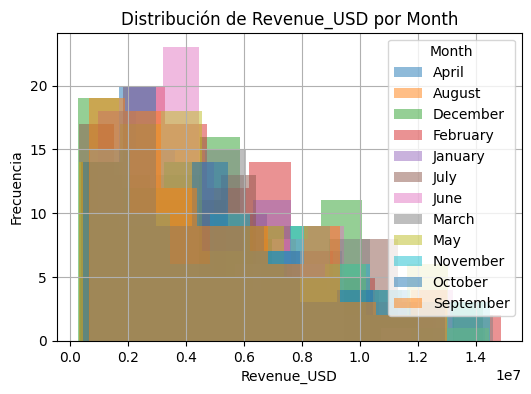

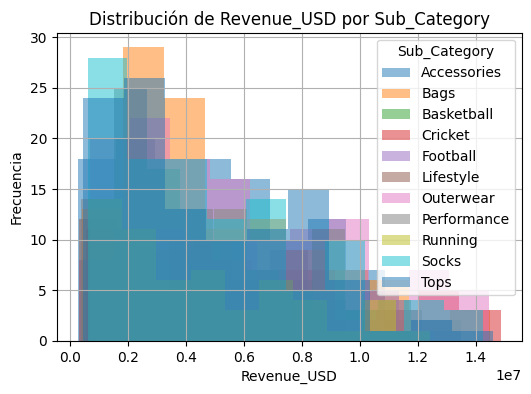

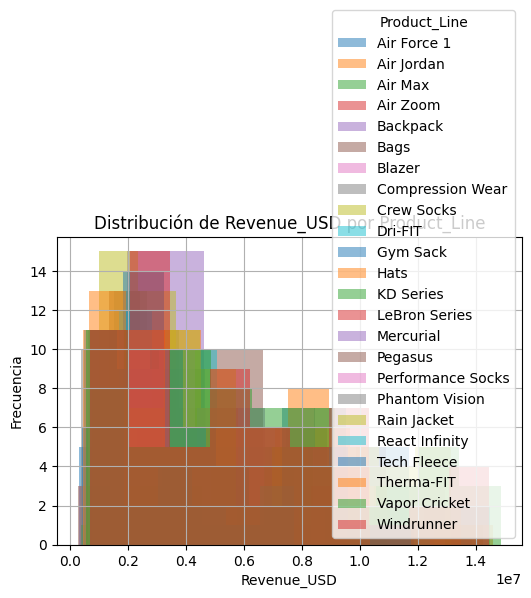

Columnas significativas: ['Month', 'Sub_Category', 'Product_Line']
Columnas significativas: []


In [18]:
# Llamada a la función con columns especificado
result = plot_grouped_histograms(df, target_col='Revenue_USD', columns=['Month', 'Sub_Category', 'Product_Line'], pvalue=0.05, with_individual_plot=True)
print("Columnas significativas:", result)

# Llamada a la función con columns vacío
result = plot_grouped_histograms(df, target_col='Revenue_USD', columns=[], pvalue=0.05, with_individual_plot=True)
print("Columnas significativas:", result)